In [66]:
using JLD, Mamba
include("gyncycle.jl")

acceptance(mc) = sum([mc[i,:,:] != mc[i+1,:,:] for i in 1:size(mc,1)-1]) / (size(mc,1)-1);

mergeparms!(aparms, sparms) = (aparms[SAMPLEPARMS]=sparms; aparms)

mergeparms(aparms,sparms) = mergeparms!(copy(aparms), sparms)

function loglikelihood(mc::Array{Float64,3}, data::Matrix)
    mapslices(mc.value, 2) do modelparms
        aparms = mergeparms(parms, modelparms[1:length(SAMPLEPARMS)])
        y0 = modelparms[length(SAMPLEPARMS)+1:end]
        loglikelihood(data, aparms, y0)
    end
end

loglikelihood(mc::AbstractChains, data::Matrix) = loglikelihood(mc.value, data);

In [128]:
mcs = load("walks.jld")["mc"]
map(size,mcs)

3-element Array{Any,1}:
 (10800,115,1)
 (10700,115,1)
 (10700,115,1)

In [129]:
mc=mcs[1] # select one person
acceptance(pmc)

0.8498748957464554

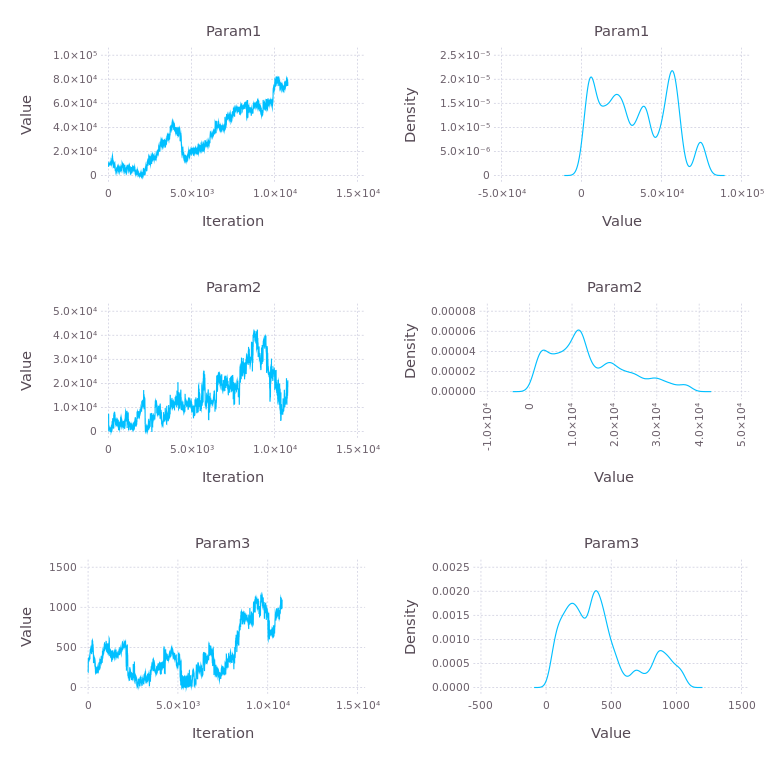

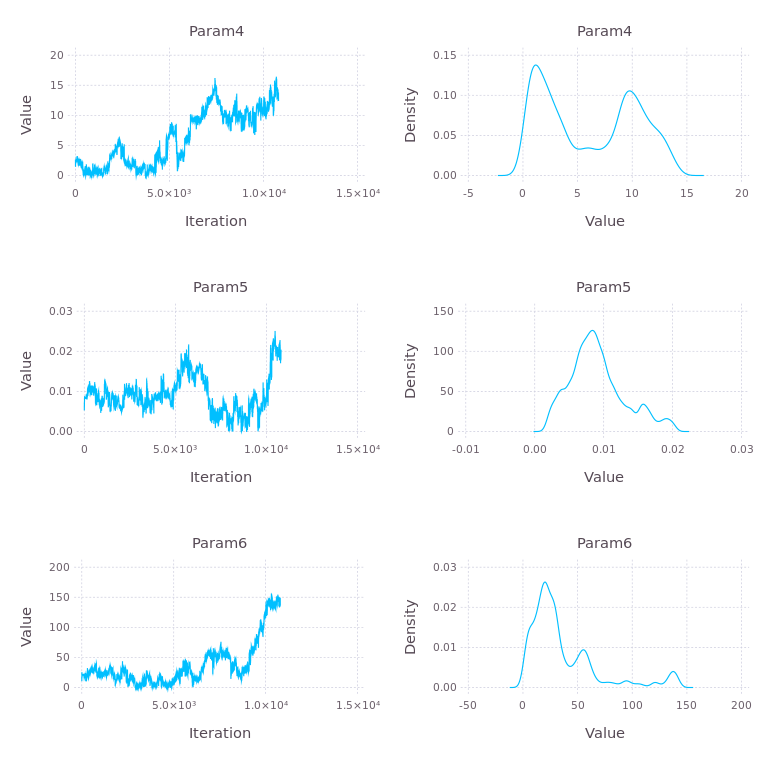

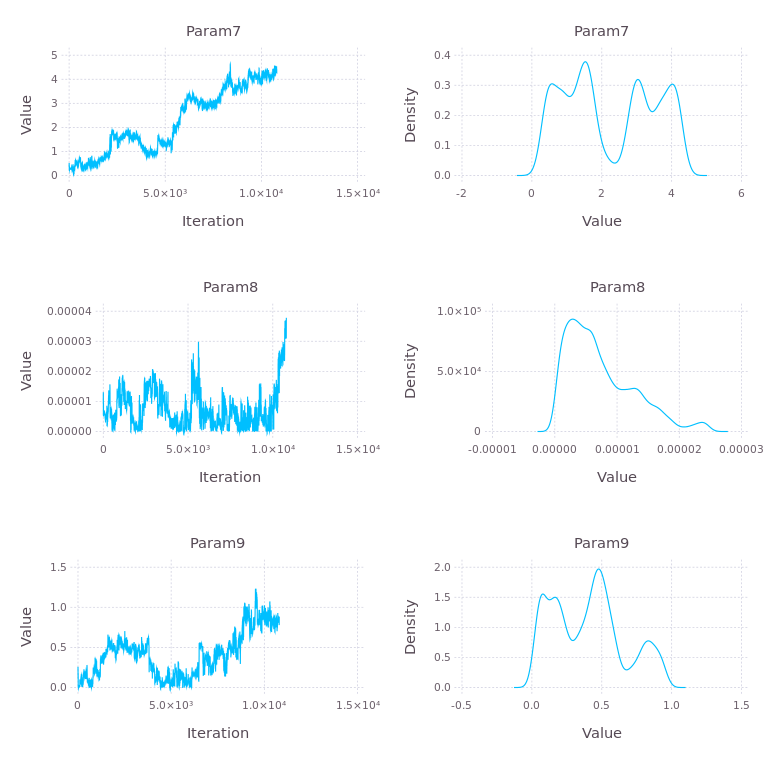

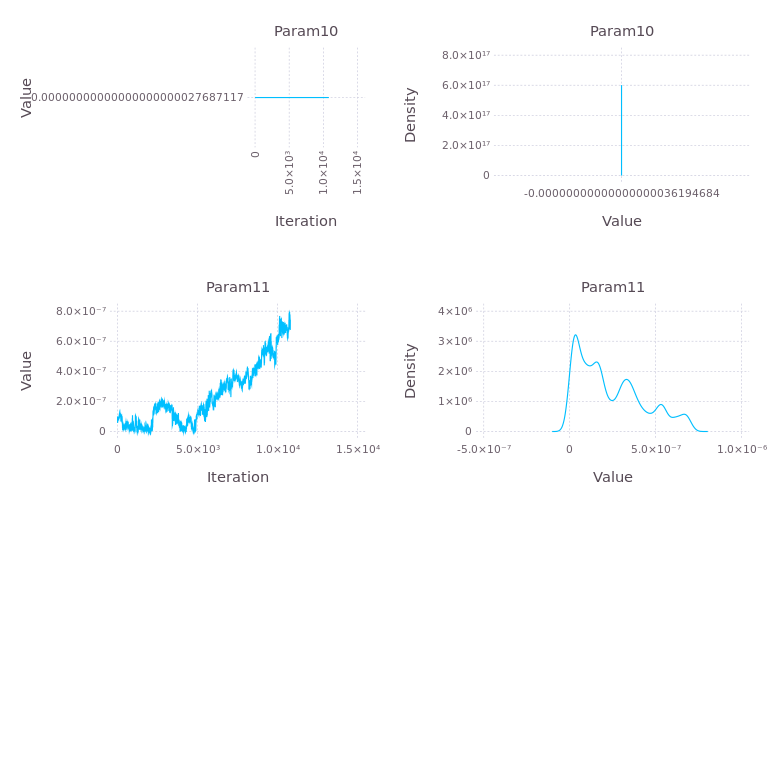

In [130]:
draw(plot(Chains(mc[:,[1:5;95:100],:])), ask=false, fmt=:png)

In [110]:
using Clustering
means = mapslices(Base.mean, pmc, 1)
scale = diagm(vec(means))
km = kmeans(inv(scale)*reshape(pmc,size(pmc)[[1,2]])',3)
(km.counts, scale * km.centers)

([501,409,290],
115x3 Array{Float64,2}:
 9082.09         5955.83          5440.9        
 2976.63         3268.11          4784.52       
  368.829         331.761          499.153      
    1.85356         0.559288         0.737096   
    0.00979852      0.00859096       0.008834   
    0.0979457       0.0696969        0.123549   
    0.000475287     0.000129881      0.000101034
    3.19859         1.74371          6.0756     
    0.683835        0.847601         1.45741    
   57.0188         44.554           39.9215     
   55.6827         81.3003         116.355      
   55.3138         25.0695          50.6725     
 7683.01         8794.58         37506.2        
    ⋮                                           
    0.00877638      0.0116859        0.0155589  
    0.0127702       0.0247066        0.0494373  
   47.6024         36.8239          37.2779     
    8.81155         8.23019          4.31163    
    2.10498         3.01137          3.71194    
   58.8777         84.9017   